In [2]:
data<-read.csv("Data_Projects.csv", sep=";", dec=",")

#### 1. Проанализируйте распределения признаков, которые вы хотите включить в модель. Обращайте внимание на наличие выбросов, не забывайте, что нетипичные значения всегда образуют отдельные, не информативные и ненаполненные кластеры.

In [3]:
head(data)

AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
156,20,1903,176,0.4161044,0.5357625,1125,749.9661,1
17,37,258,20,0.2116788,0.4306569,157,2289.0324,0
78,56,1956,185,0.3494754,0.4765940,1195,1423.3765,1
14,70,378,19,0.3187184,0.4637437,206,3396.5661,0
111,90,4089,90,0.5561755,0.4905733,2934,1576.5142,1
53,96,1669,162,0.3989782,0.4217371,991,2337.6038,0


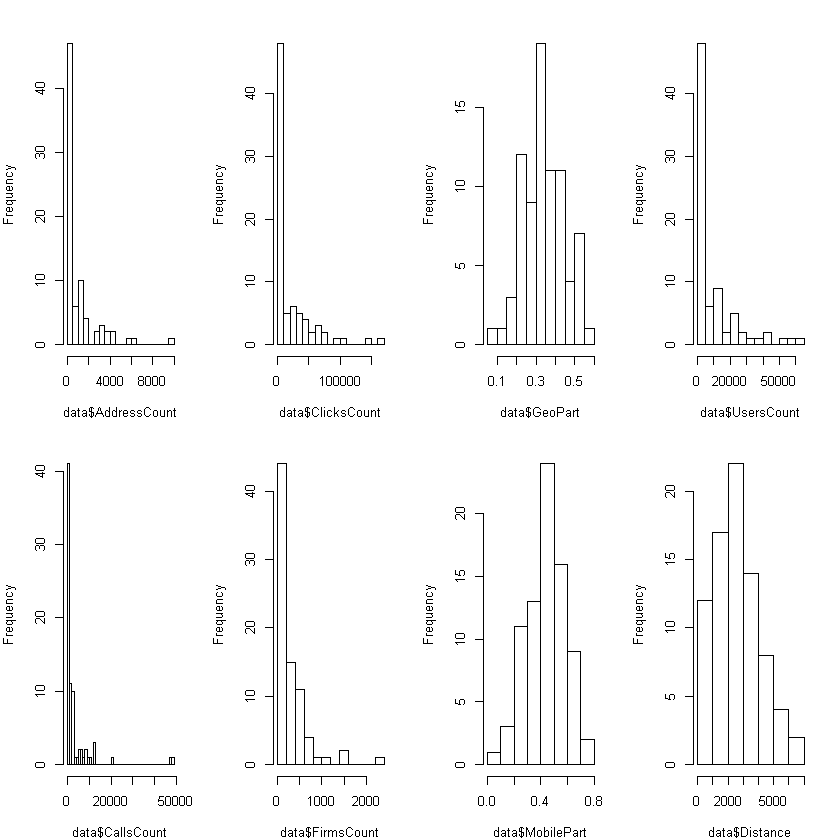

In [4]:
par(mfcol=c(2,4), mar=c(4,4,2,2))
hist(data$AddressCount, breaks="FD", main="")
hist(data$CallsCount, breaks="FD", main="")
hist(data$ClicksCount, breaks="FD", main="")
hist(data$FirmsCount, breaks="FD", main="")
hist(data$GeoPart, breaks="FD", main="")
hist(data$MobilePart, breaks="FD", main="")
hist(data$UsersCount, breaks="FD", main="")
hist(data$Distance, breaks="FD", main="")

Можно невооруженным глазом подметить, что AddressCount, CallsCount, ClicksCount, FirmsCount, UsersCount близки к логнормальному распределению. Тогда как GeoPart, MobilePart, Distance имеют куполообразное распределение с некоторой асимметрией и признаками смеси в данных. Distance явно асимметричен для нормального. Заранее известно, что в данных может быть смесь геонезависимых и геозависимых сфер, определенных бинарным признаком IsGeo (его гистограмму строить не имеет смысла).
Все признаки (за исключением IsGeo) представлены в метрических шкалах, поэтому они все пригодны для дальнейшего анализа стандартными методами. Однако логнормально-распределенные признаки следует приблизить к нормальности, чтобы избежать смещенных оценок, опирающихся на меры среднего. Для этого прологарифмируем AddressCount, CallsCount, ClicksCount, FirmsCount, UsersCount для дальнейшего анализа.

#### 2. Подготовьте переменные для включения в модель, зафиксируйте (и опишите в работе), как преобразовывались признаки, какие значения отбрасывались.

Прологарифмируем AddressCount, CallsCount, ClicksCount, FirmsCount, UsersCount для дальнейшего анализа.

In [5]:
data$AddressCount<-log10(data$AddressCount)
data$CallsCount<-log10(data$CallsCount)
data$ClicksCount<-log10(data$ClicksCount)
data$FirmsCount<-log10(data$FirmsCount)
data$UsersCount<-log10(data$UsersCount)
data$Distance<-log10(data$Distance)

In [7]:
library(car)

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData


[1] 78 79

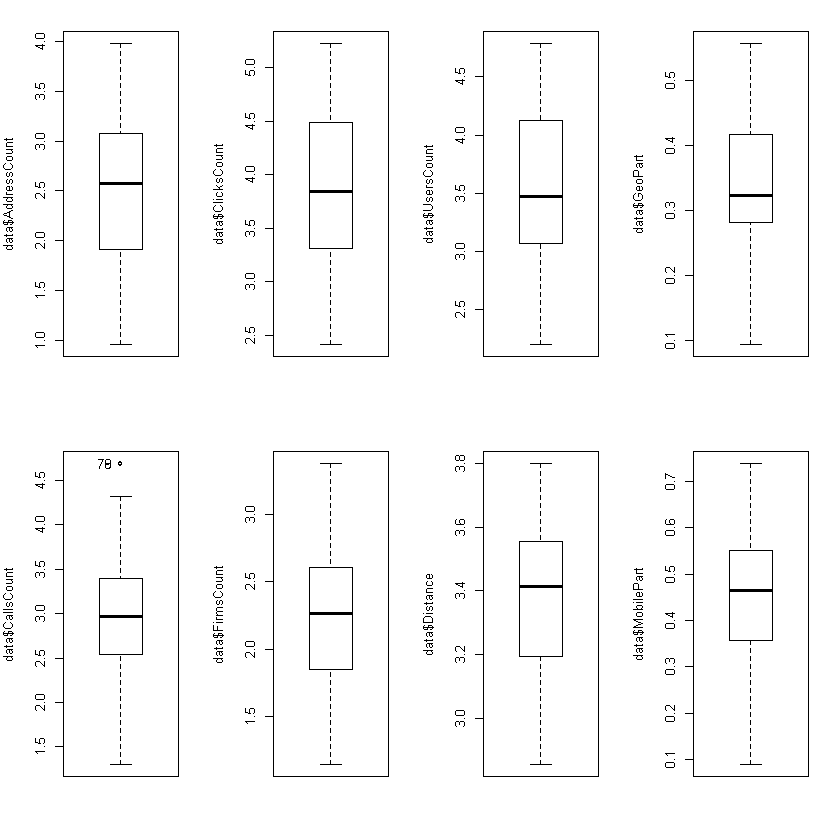

In [8]:
par(mfcol=c(2,4), mar=c(4,4,2,2))
Boxplot(data$AddressCount)
Boxplot(data$CallsCount)
Boxplot(data$ClicksCount)
Boxplot(data$FirmsCount)
Boxplot(data$UsersCount, id=TRUE)
Boxplot(data$Distance)
Boxplot(data$GeoPart)
Boxplot(data$MobilePart)

Чтож, теперь распределения достаточно симметричны. Есть два выброса в CallsCount (78, 79). Удалим их.

In [ ]:
data[78,]<-NA
data[79,]<-NA
data<-na.omit(data)

#### 3. Постройте кластеризацию методом k-средних. Попробуйте построить несколько решений и выберите самое, на ваш взгляд, лучшее, основываясь на любом из методов, который мы разбирали в курсе. Опишите в работе, как вы отбирали оптимальную модель.

Для начала попробуем определить оптимальное число кластеров на основе дендрограммы иерархического кластерного анализа.

In [ ]:
plot(hclust(dist(data)))

Визуальный анализ показывает, что разбиение на 6-7 кластеров будет достаточно информативно. Создадим несколько разбиений и сравним их по эвристическому критерию - наполненности кластеров.

In [ ]:
k5<-kmeans(data, centers=5, nstart=50)
k6<-kmeans(data, centers=6, nstart=50)
k7<-kmeans(data, centers=7, nstart=50)
k8<-kmeans(data, centers=8, nstart=50)

In [ ]:
k5$size
k6$size
k7$size
k8$size


In [ ]:
k5$centers

С точки зрения эвристического критерия полноты кластеров (не менее 10% объектов) - примем в качестве пригодного решение с 5 кластерами.

#### 4. Оцените, все ли признаки существенно различают группы, не нужно ли исключить какой-либо из них. Если исключение необходимо, укажите и объясните это в работе.

С точки зрения разброса расстояний центров возможно стоит исключить из рассмотрения признак Distance. Возможно также нет достаточно значимых различий между кластерами по GeoPart и MobilePart, однако исключать мы их не будем ввиду ценности для интерпретации результатов.

In [ ]:
data<-data[,c(1:7,9)]
k5<-kmeans(data, centers=5, nstart=50)
k5$centers
data$cluster<-k5$cluster

#### 5. Опишите кластеры содержательно: какие рубрики попали в какой из кластеров? В чём особенности кластеров? Можете придумать группам какие-нибудь яркие, запоминающиеся названия, которые отражают особенности построенных кластеров.

In [ ]:
plot(data[1:8], col=k5$centers, pch=19, cex=1)

Можно заметить что в совокупности выделяются две пары групп, в среднем похожих, но отличающихся наличием или отсустствием геозависимости (две группы IsGeo=1 и две группы IsGeo=0). Также выделяется одна принципиально отличающаяся по всем признакам группа с центром 0.05 по IsGeo.

В каждой паре (геозависимой и геонезависимой) выделяется группа с высокими значениями всех признаков и группа с низкими значениями. Исключительная группа (0.05 по IsGeo) имеет очевидно минимальные координаты центра по всем измерениям.

#### 6. Сравните кластеры по доле трафика с карты и с мобильных продуктов (признаки GeoPart и MobilePart соответственно). Предварительно проанализируйте признаки, по которым будете сравнивать, и выберите соответствующий критерий для сравнения. Опишите выбор критерия: как выбирали, и почему остановились именно на этом?

Посмотрим для начала диаграмму рассеяния по данным признакам в кластерах с нанесением центров кластеров.

In [ ]:
plot(data[,5:6], col=k5$centers, pch=19, cex=1)
points(k5$centers[,5:6], pch=4, cex=4, lwd=4, col=as.integer(rownames(k5$centers[,5:6])))

In [ ]:
par(mfcol=c(1,2), mar=c(4,4,2,2))
Boxplot(data$GeoPart)
Boxplot(data$MobilePart)

Данные признаки распределены достаточно симметрично и не обнаруживают выбросов. Проверим их нормальность используя достаточно мощный критерий Шапиро-Уилка. Заодно посмотрим Q-Q графики сравнения с нормальным распределением.

In [ ]:
shapiro.test(data$GeoPart)
shapiro.test(data$MobilePart)
par(mfcol=c(1,2), mar=c(4,4,2,2))
qqnorm(data$GeoPart)
qqnorm(data$MobilePart)

p-value критерия Шапиро-Уилка значительно превышает 0.05, поэтому данные в целом можно признать распределенными нормально. Это значит, что мы можем использовать критерии сравнения кластеров (как несвязанных выборок) основанные на распределениях стьюдента и Фишера, в том числе ANOVA.

#### 7. Сделайте содержательный вывод о различиях между кластерами, а также вывод о статистической значимости выявленных различий. Различаются ли кластеры (группы рубрик/сфер) по доле трафика с карты и с мобильных продуктов? Как именно? Значимы ли эти различия статистически?

Воспользуемся возможностью выполнить дисперсионный анализ (ANOVA).

In [ ]:
with(data, summary(aov(GeoPart ~ cluster))) #ANOVA
with(data, summary(aov(MobilePart ~ cluster)))

Результаты дисперсионного анализа показывают, что в случае GeoPart и MobilePart кластеры статистически значимо различаются на уровне p>0.05 (имеются как минимум два кластера, отличающихся в среднем).